In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(0)

In [35]:
def data_preparation(data):
    features = data.iloc[:,0:-1]
    label = data.iloc[:,-1]
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)

    #Standarad scaler is not applied since all the features are outcomes of PCA and are already standardized.
    #sc = StandardScaler()
    #x_train = sc.fit_transform(x_train)
    #x_test = sc.transform(x_test)
    
    print("Length of training data",len(x_train))
    print("Length of test data",len(x_test))
    return x_train,x_test,y_train,y_test

In [36]:
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    print("\n----------Accuracy Scores on Train data------------------------------------")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))


    print("\n----------Accuracy Scores on Test data------------------------------------")
    y_pred_test = model.predict(x_test)
    
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    ax1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Train Data")

    ax2 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Test Data")

In [37]:
#Loading Dataset
cc_dataset = pd.read_csv("creditcard.csv")

In [38]:

cc_dataset.shape

(284807, 31)

In [39]:
cc_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:

cc_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
cc_dataset.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [42]:
cc_dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

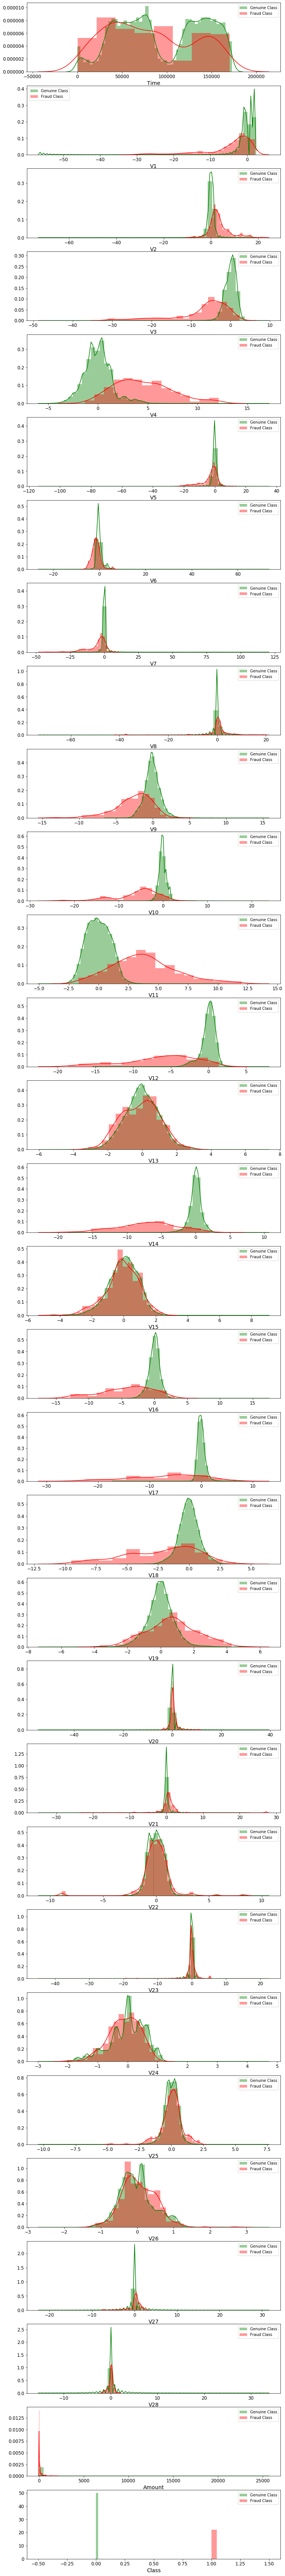

In [43]:
v_features = cc_dataset.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_dataset[col][cc_dataset['Class']==0],color='g',label='Genuine Class')
    sns.distplot(cc_dataset[col][cc_dataset['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

In [44]:
cc_dataset.drop(labels = ['Time'], axis = 1, inplace=True)

In [49]:
cc_dataset['Amount'] = StandardScaler().fit_transform(cc_dataset['Amount'].values.reshape(-1,1))

In [50]:
x_train,x_test,y_train,y_test = data_preparation(cc_dataset)

Length of training data 227845
Length of test data 56962


In [51]:
os = SMOTE(random_state=0)

In [52]:
#Generate the oversample data
os_res_x,os_res_y=os.fit_sample(x_train,y_train)
#Counts of each class in oversampled data
print(sorted(Counter(os_res_y).items()))

[(0, 227454), (1, 227454)]



----------Accuracy Scores on Train data------------------------------------
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.8527918781725888
Precision Score:  0.875
Recall Score:  0.8316831683168316


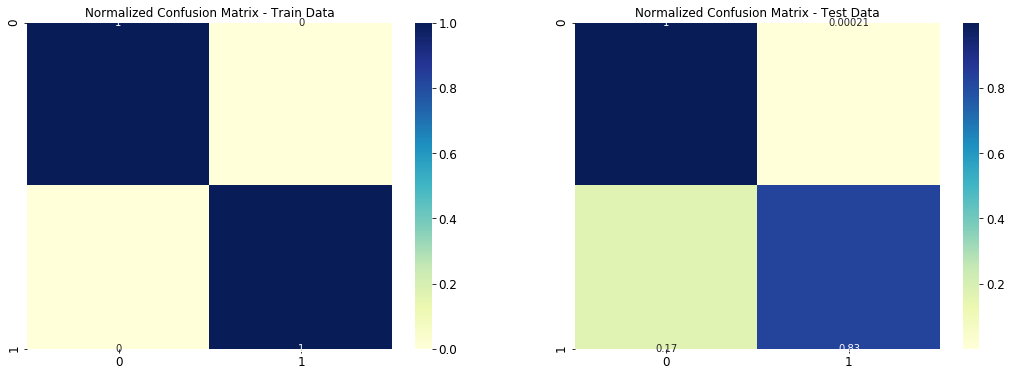

In [54]:
#RandomForest for training over-sampled data set. 
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1, random_state=0)
#Train the model on oversampled data and check the performance on original test data
build_model_train_test(rnd_clf,os_res_x,x_test,os_res_y,y_test)

In [55]:
kmeans_best = KMeans(n_clusters = 11, init = 'k-means++', random_state = 0)
train_clusters = kmeans_best.fit_predict(x_train)

In [56]:

#Merge clusters with other input features on Train Data
x_train2 = np.c_[(x_train,train_clusters )]
x_train2.shape

(227845, 30)

In [57]:
#Predict the cluster for test data & merge it with other features
test_clusters = kmeans_best.predict(x_test)
x_test2 = np.c_[(x_test,test_clusters )]
x_test2.shape

(56962, 30)

In [58]:
#Generate the oversample data for training purpose
os_res_x2,os_res_y2=os.fit_sample(x_train2,y_train)
#Counts of each class in oversampled data
print(sorted(Counter(os_res_y2).items()))

[(0, 227454), (1, 227454)]



----------Accuracy Scores on Train data------------------------------------
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.8686868686868687
Precision Score:  0.8865979381443299
Recall Score:  0.8514851485148515


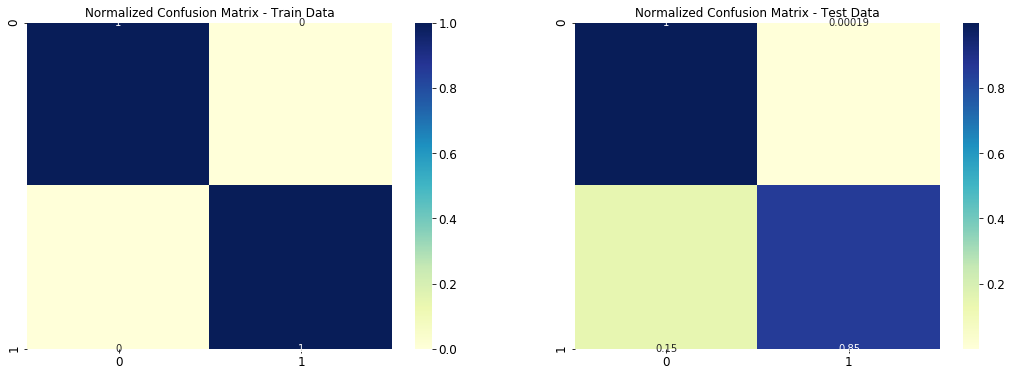

In [59]:
#RandomForest for training over-sampled data set. 
rnd_clf2 = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1, random_state=0)
#Train the model on oversampled data and check the performance on actual test data
build_model_train_test(rnd_clf2,os_res_x2,x_test2,os_res_y2,y_test)

In [60]:
#Let us check cross validation scores on the orginal train data
cv_score = cross_val_score(rnd_clf2,x_train2,y_train,cv=5,scoring='f1')
print("Average F1 score CV",cv_score.mean())

Average F1 score CV 0.8456711783117072


In [61]:
cv_score = cross_val_score(rnd_clf2,x_train2,y_train,cv=5,scoring='recall')
print("Average Recall score CV",cv_score.mean())

Average Recall score CV 0.7724115546900358
